# Intro

On the following file I will analyze who different attributes of the passangers in the Titanic influenced whenever they survived or not from the tragic accident. 

 the subject matter may be grim, I shall sprinkle it with light-heartedness, hoping my quirky sense of humor doesn't cause you to abandon ship along the way!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

#this is to to avoid seeing the warnings
import warnings
warnings.filterwarnings('ignore')


We embark in our journey a couple of libraries to be able to analyze this dataset.

In [2]:
data = pd.read_csv('data/titanic.csv')
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# General EDA

First I started checking the null values, and found out that there is some missing info

In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Shiver me timbers as we embark on a perilous voyage of data analysis, setting our sights on the survival rate o' the mighty Titanic!

We jump on checking the survival rate and we can noticed that the total survival rate is of 38%! I want to explore and see which aspects increase or decrease the probability of being in this 38%.

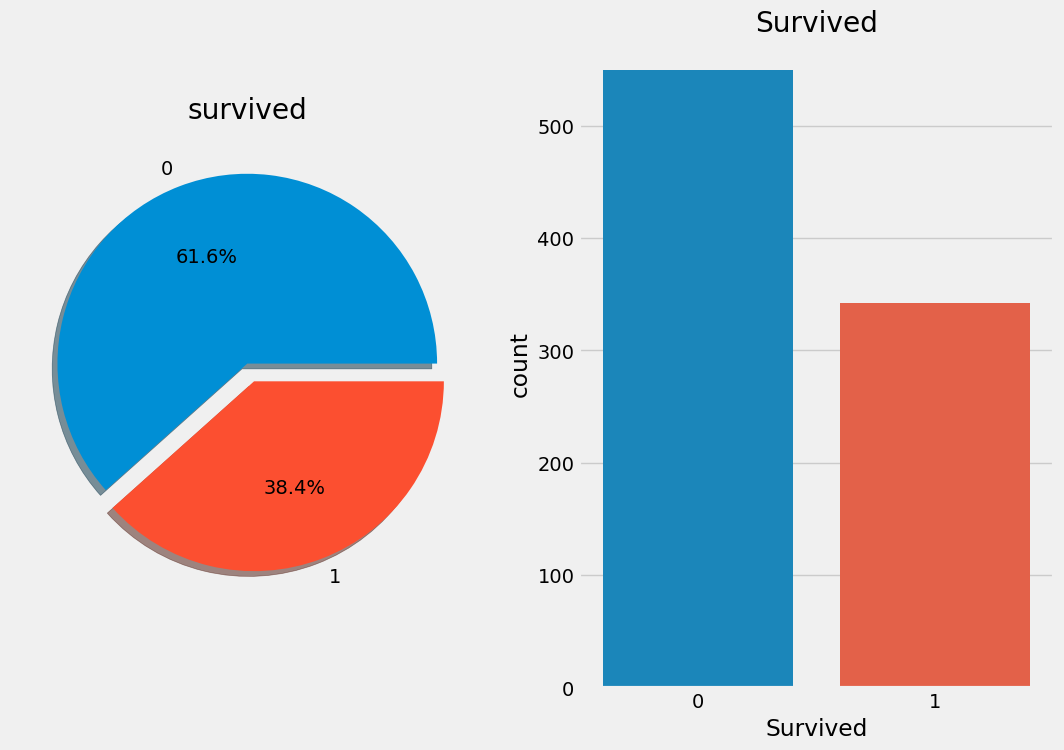

In [4]:
f, ax = plt.subplots(1,2, figsize = (12,8))
data['Survived'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[0], shadow= True)
ax[0].set_title('survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data= data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [5]:
data.info() 
#to know the Dtype of all my columns
# this is just a little bit more of exploration

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# sex
Now, let's dive into an intriguing question: does gender play a role in survival aboard the Titanic? Prepare to uncover the truth as we set sail on a data-driven voyage

In [7]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [8]:
pd.crosstab(data['Survived'], data['Sex'])
#same but with cross tab


Sex,female,male
Survived,,
0,81,468
1,233,109


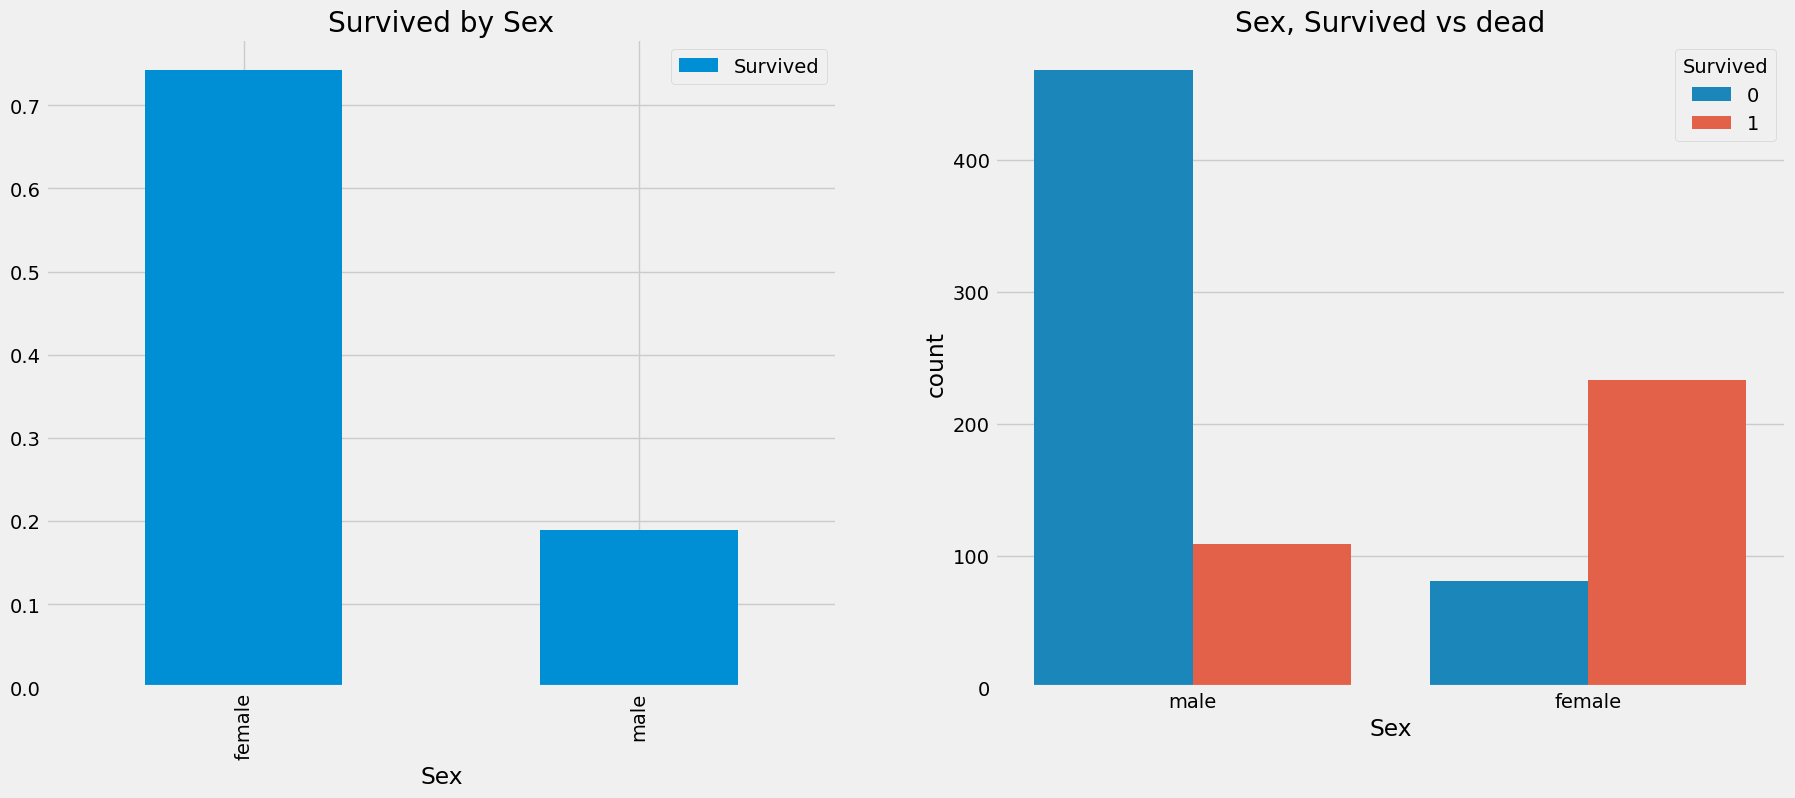

In [9]:
f, ax = plt.subplots (1,2, figsize=(20,8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived by Sex')
sns.countplot('Sex', hue='Survived', data = data , ax=ax[1])
ax[1].set_title('Sex, Survived vs dead')
plt.show()

In terms of percentages, the fairer sex, aye, the women, held a greater advantage in the battle for survival.
It seems the age-old adage of "Women and children first" held true even amidst the chaos of the Titanic

# Passanger class

I want to explore if the passanger class affects the survival rate.

In [10]:
pd.crosstab(data['Pclass'], data['Survived'], margins = True)
# 0 means didnt survived, 1 means it survived


Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


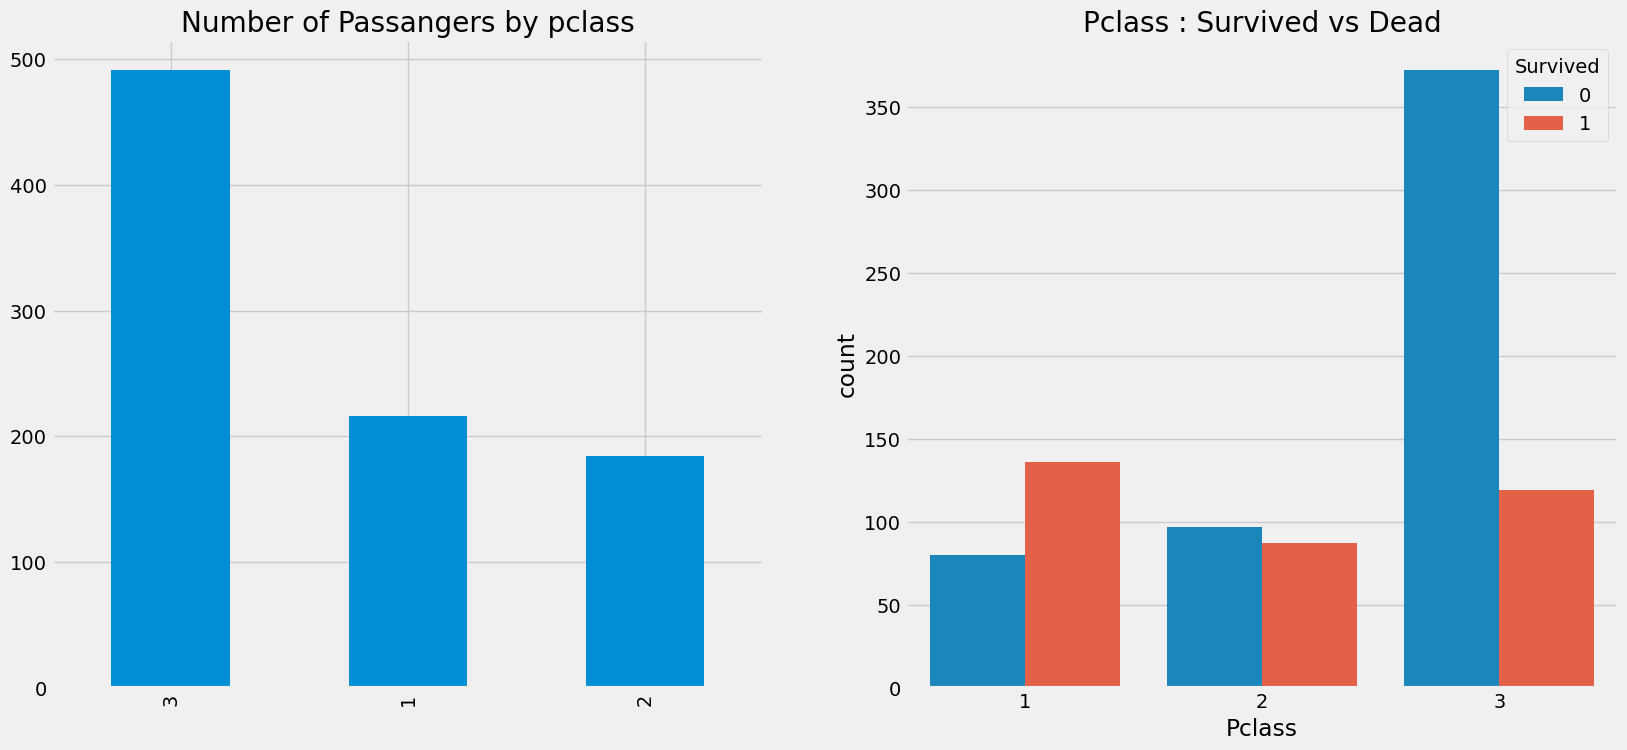

In [11]:
f, ax = plt.subplots(1,2, figsize=(18,8))
data['Pclass'].value_counts().plot.bar(ax = ax[0])
ax[0].set_title('Number of Passangers by pclass')
sns.countplot('Pclass', hue = 'Survived', data = data, ax=ax[1])
ax[1].set_title('Pclass : Survived vs Dead')
plt.show()

It can be notice that first class had more people surviving (1) than not surviving (0), while the opposite can be said for 3rd class passangers (more than triple on deaths than passangers that survived). Money can't buy happiness but apparently it can increase chances of survival.

In [12]:
pd.crosstab([data['Sex'], data['Survived']], data['Pclass'], margins =True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

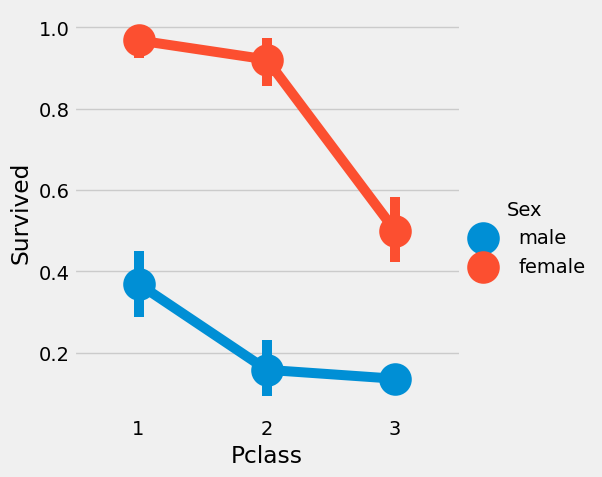

In [13]:
sns.factorplot('Pclass','Survived', hue='Sex', data=data)

Being woman and 1st class passanger survival was almost 100%, on the other hand, women that were 3rd class passanger had a 50% chance of survival. Still women had first priority, there was a higher chance of surviving being a a woman that was a 3rd class passanger than a male 1st class passanger. We can notice that clearly gender has a higher impact in survival than the passanger class.

# Age

Now I will explore if age has any impact on the survival rate

In [14]:
data['Age'].min(), data['Age'].max(),data['Age'].mean()
# checking the range of ages between the passangers

(0.42, 80.0, 29.69911764705882)

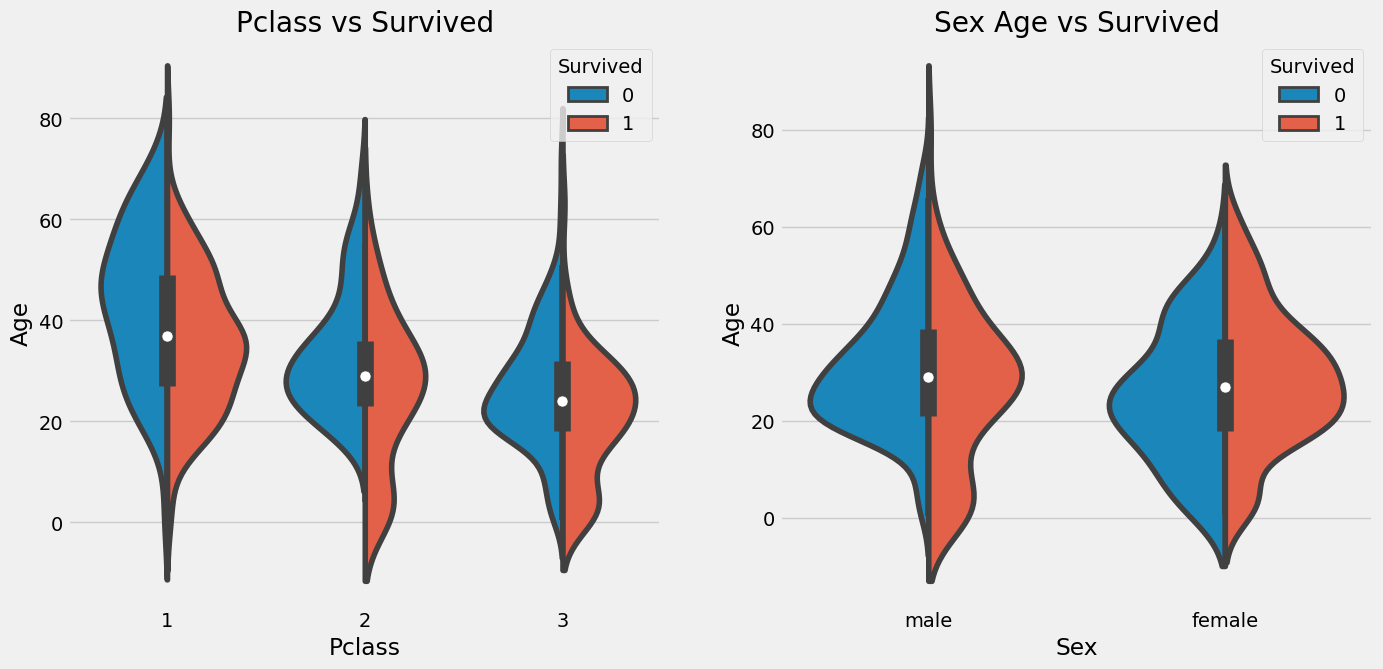

In [15]:
f, ax = plt.subplots(1,2, figsize= (15,7))
sns.violinplot('Pclass','Age', hue = 'Survived', data = data, split = True, ax= ax[0])
ax[0].set_title('Pclass vs Survived')
sns.violinplot('Sex', 'Age', hue = 'Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex Age vs Survived')
plt.show()

We can oversee that number of children and younger people has a higher chance of surival, and that on first class passangers between 20 and 40 is higher comparing to other ages and classes. Also on just age, usually for male, the chance of survival decreases as the age increases.

In [16]:
data.isnull().sum()
# we have age and cabin missing

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

very difficult to fill with a value, but we have to see if its possible to proedict which age range they belong to. But we can sue the name for it (for example, Mr, Miss, etc) to get a mea value from the same


In [17]:
# 27 ....


In [18]:
data['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [19]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data['Name'].str.extract('([A-Za-z]+)\.')

In [20]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss


In [21]:
pd.crosstab(data['Initial'], data['Sex'])

Sex,female,male
Initial,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


There are many initials so I want to reduce them, I will replace some of them with the following:

In [22]:
data['Initial'].replace(['Mile','Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Mlle' ],['Miss','Miss', 'Miss', 'Mr','Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mrs'], inplace=True)

In [23]:
pd.crosstab(data['Initial'], data['Sex'])

Sex,female,male
Initial,,
Master,0,40
Miss,184,0
Mr,1,528
Mrs,129,0
Other,0,9


In [24]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.831081
Mr        32.739609
Mrs       35.767857
Other     45.888889
Name: Age, dtype: float64

With this we can check the average age of each group.

In [25]:
# mean for only Mr.
mr_age = data[data['Initial'] == 'Mr']['Age'].mean()
mr_age


32.73960880195599

In [29]:
master_age = data[data['Initial'] == 'Master']['Age'].mean()
miss_age = data[data['Initial'] == 'Miss']['Age'].mean()
mrs_age = data[data['Initial'] == 'Mrs']['Age'].mean()
other_age = data[data['Initial'] == 'Other']['Age'].mean()


# Fill null ages

In [27]:
data.loc[data['Age'].isnull()].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Mr
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Mrs
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Mr
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Miss


It can be noticed on the dataframe above that age has some null values, so i will search to fill this values with the average age of that group.

In [30]:
data.loc[(data['Age'].isnull()) & (data['Initial']=='Mr'), 'Age' ] = mr_age
data.loc[(data['Age'].isnull()) & (data['Initial']=='Master'), 'Age' ] = master_age
data.loc[(data['Age'].isnull()) & (data['Initial']=='Miss'), 'Age' ] = miss_age
data.loc[(data['Age'].isnull()) & (data['Initial']=='Mrs'), 'Age' ] = mrs_age
data.loc[(data['Age'].isnull()) & (data['Initial']=='Other'), 'Age' ] = other_age

data['Age'].isnull().sum()


0

We replaced all null values with the means of their age group. We now have 0 null valuez

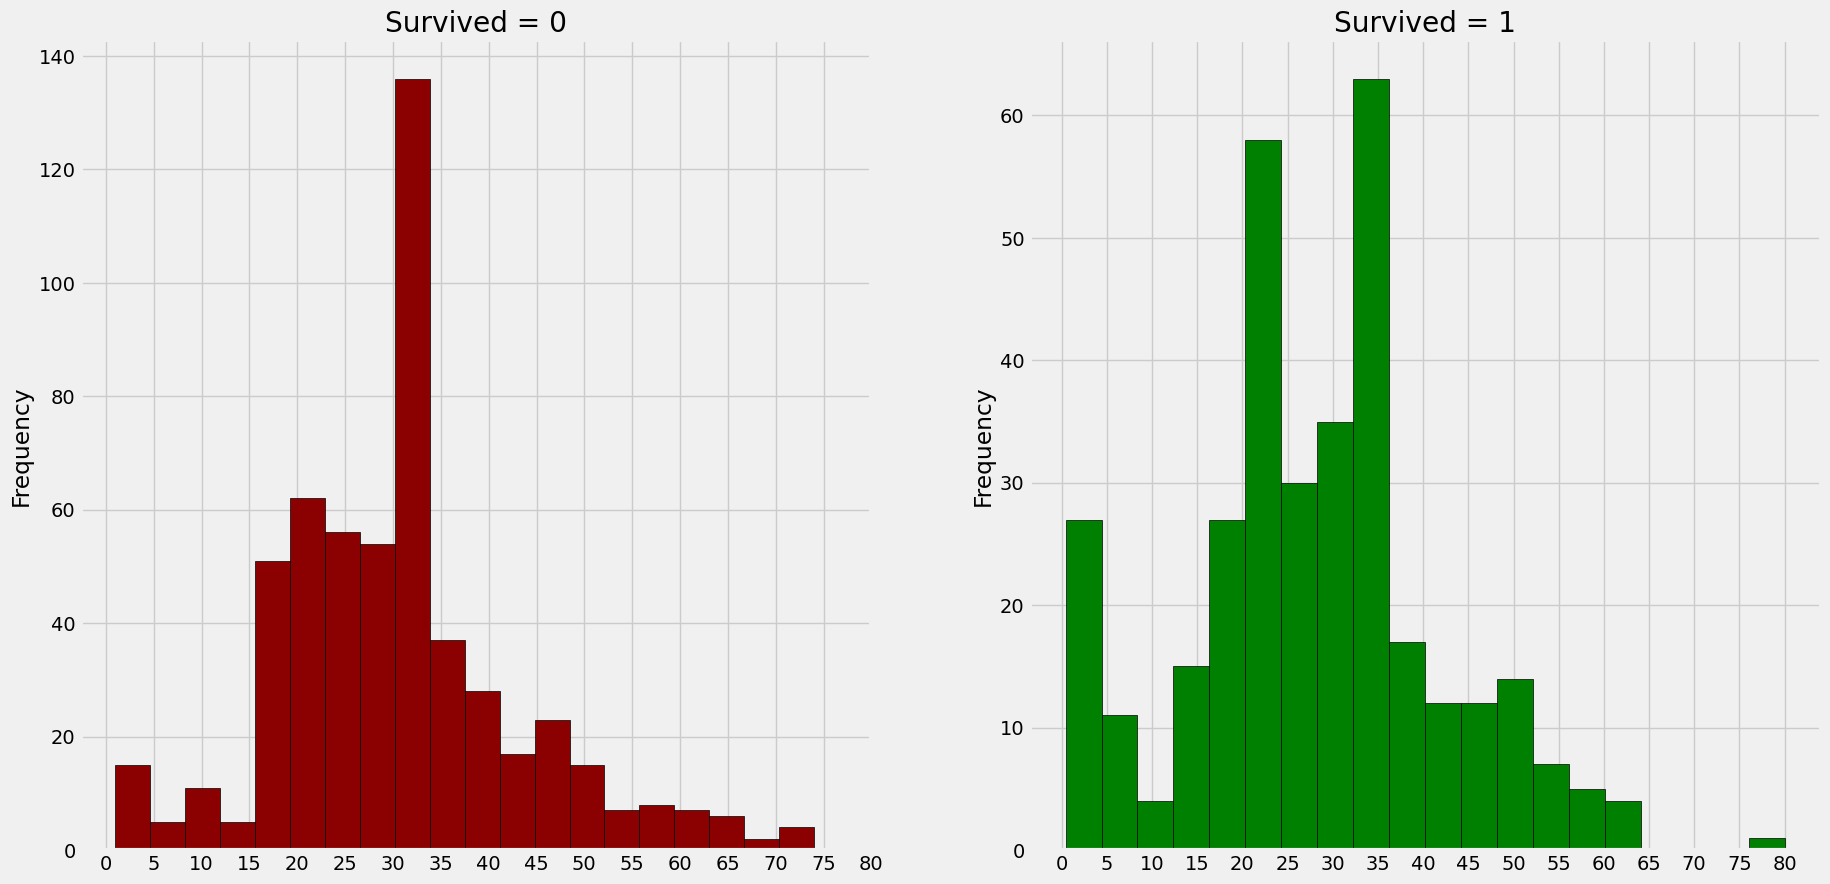

In [33]:
f, ax = plt.subplots(1,2, figsize = (20, 10))

data[data['Survived'] == 0 ].Age.plot.hist(ax=ax[0], bins = 20, edgecolor = 'black', color = 'darkred')
ax[0].set_title('Survived = 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)

data[data['Survived'] == 1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived = 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

Some observations:

The toddlers (less than 5 years)  they were actually saved in large numbers, this could be cause of the 'women and child first' policy.

we can also observe that there is a  huge peak between 30 and 35 years when it comes to deaths.

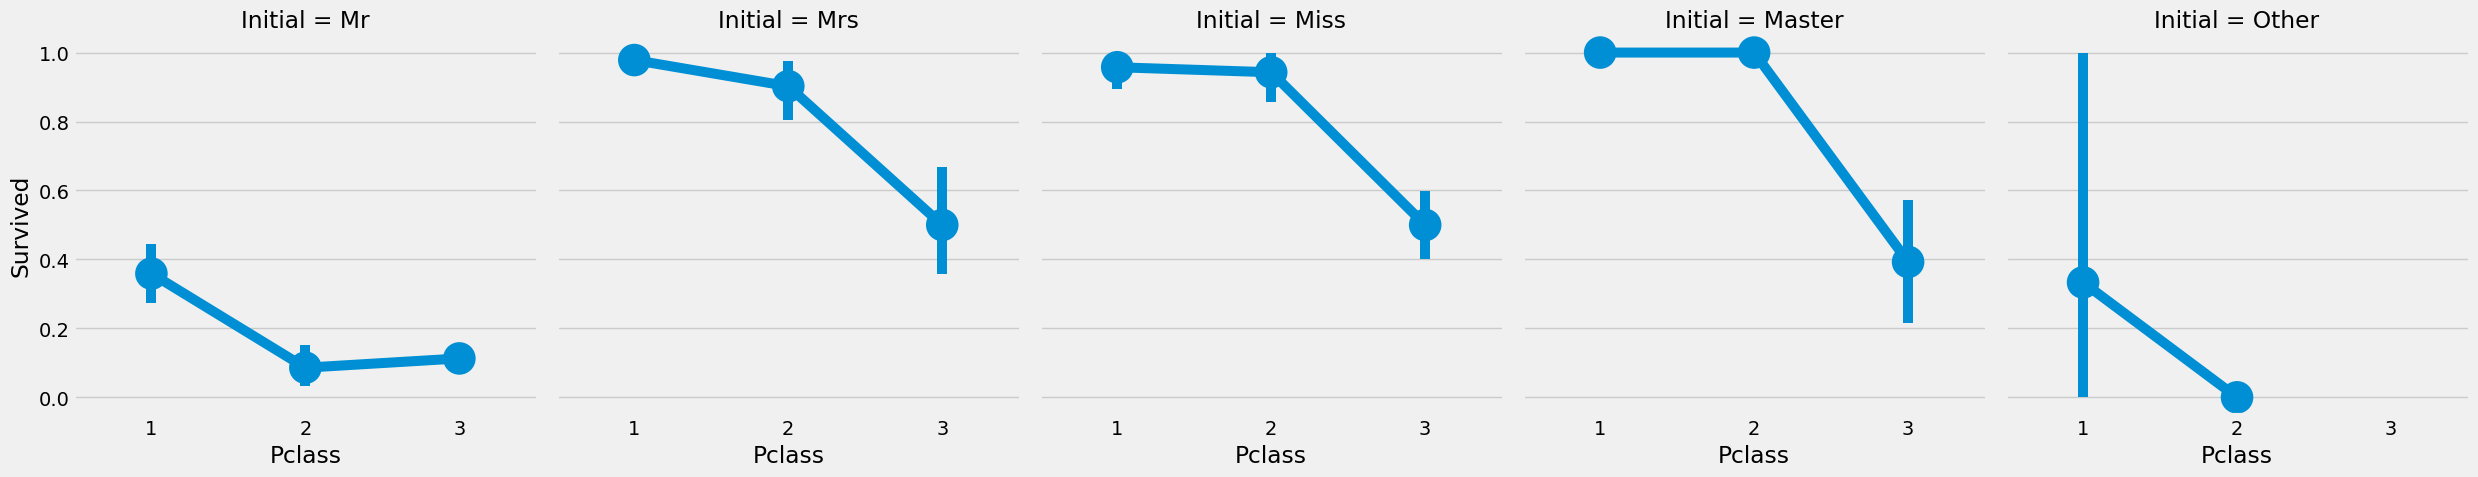

In [34]:
sns.factorplot('Pclass','Survived', col='Initial', data=data)

We can observe that women (Mrs and Miss) and Master (toddlers and kids), had a higher chance of survival. even women on 3rd class had a higher survival chance and a man in 1st class.

# Embarked data

In [35]:
pd.crosstab([data['Embarked'], data['Pclass']], [data['Sex'], data['Survived']], margins = True)

Sex             female      male       All
Survived             0    1    0    1     
Embarked Pclass                           
C        1           1   42   25   17   85
         2           0    7    8    2   17
         3           8   15   33   10   66
Q        1           0    1    1    0    2
         2           0    2    1    0    3
         3           9   24   36    3   72
S        1           2   46   51   28  127
         2           6   61   82   15  164
         3          55   33  231   34  353
All                 81  231  468  109  889

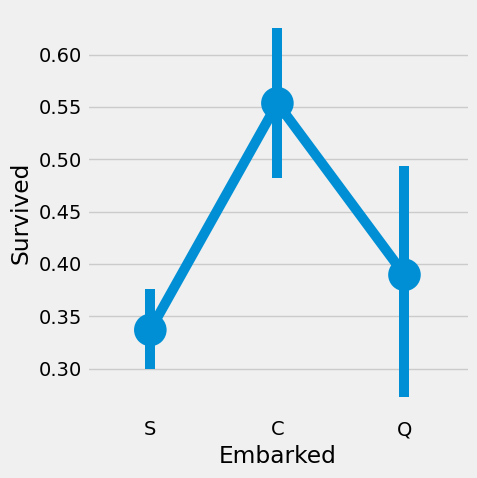

In [36]:
sns.factorplot('Embarked', 'Survived', data= data)
plt.show()

the chances of survival for people that got boarded on the Board C, had 55% while people tht gor boarded on the Board S, has a lot lower chance with 35%

Text(0.5, 1.0, 'Embarked vs Pclass')

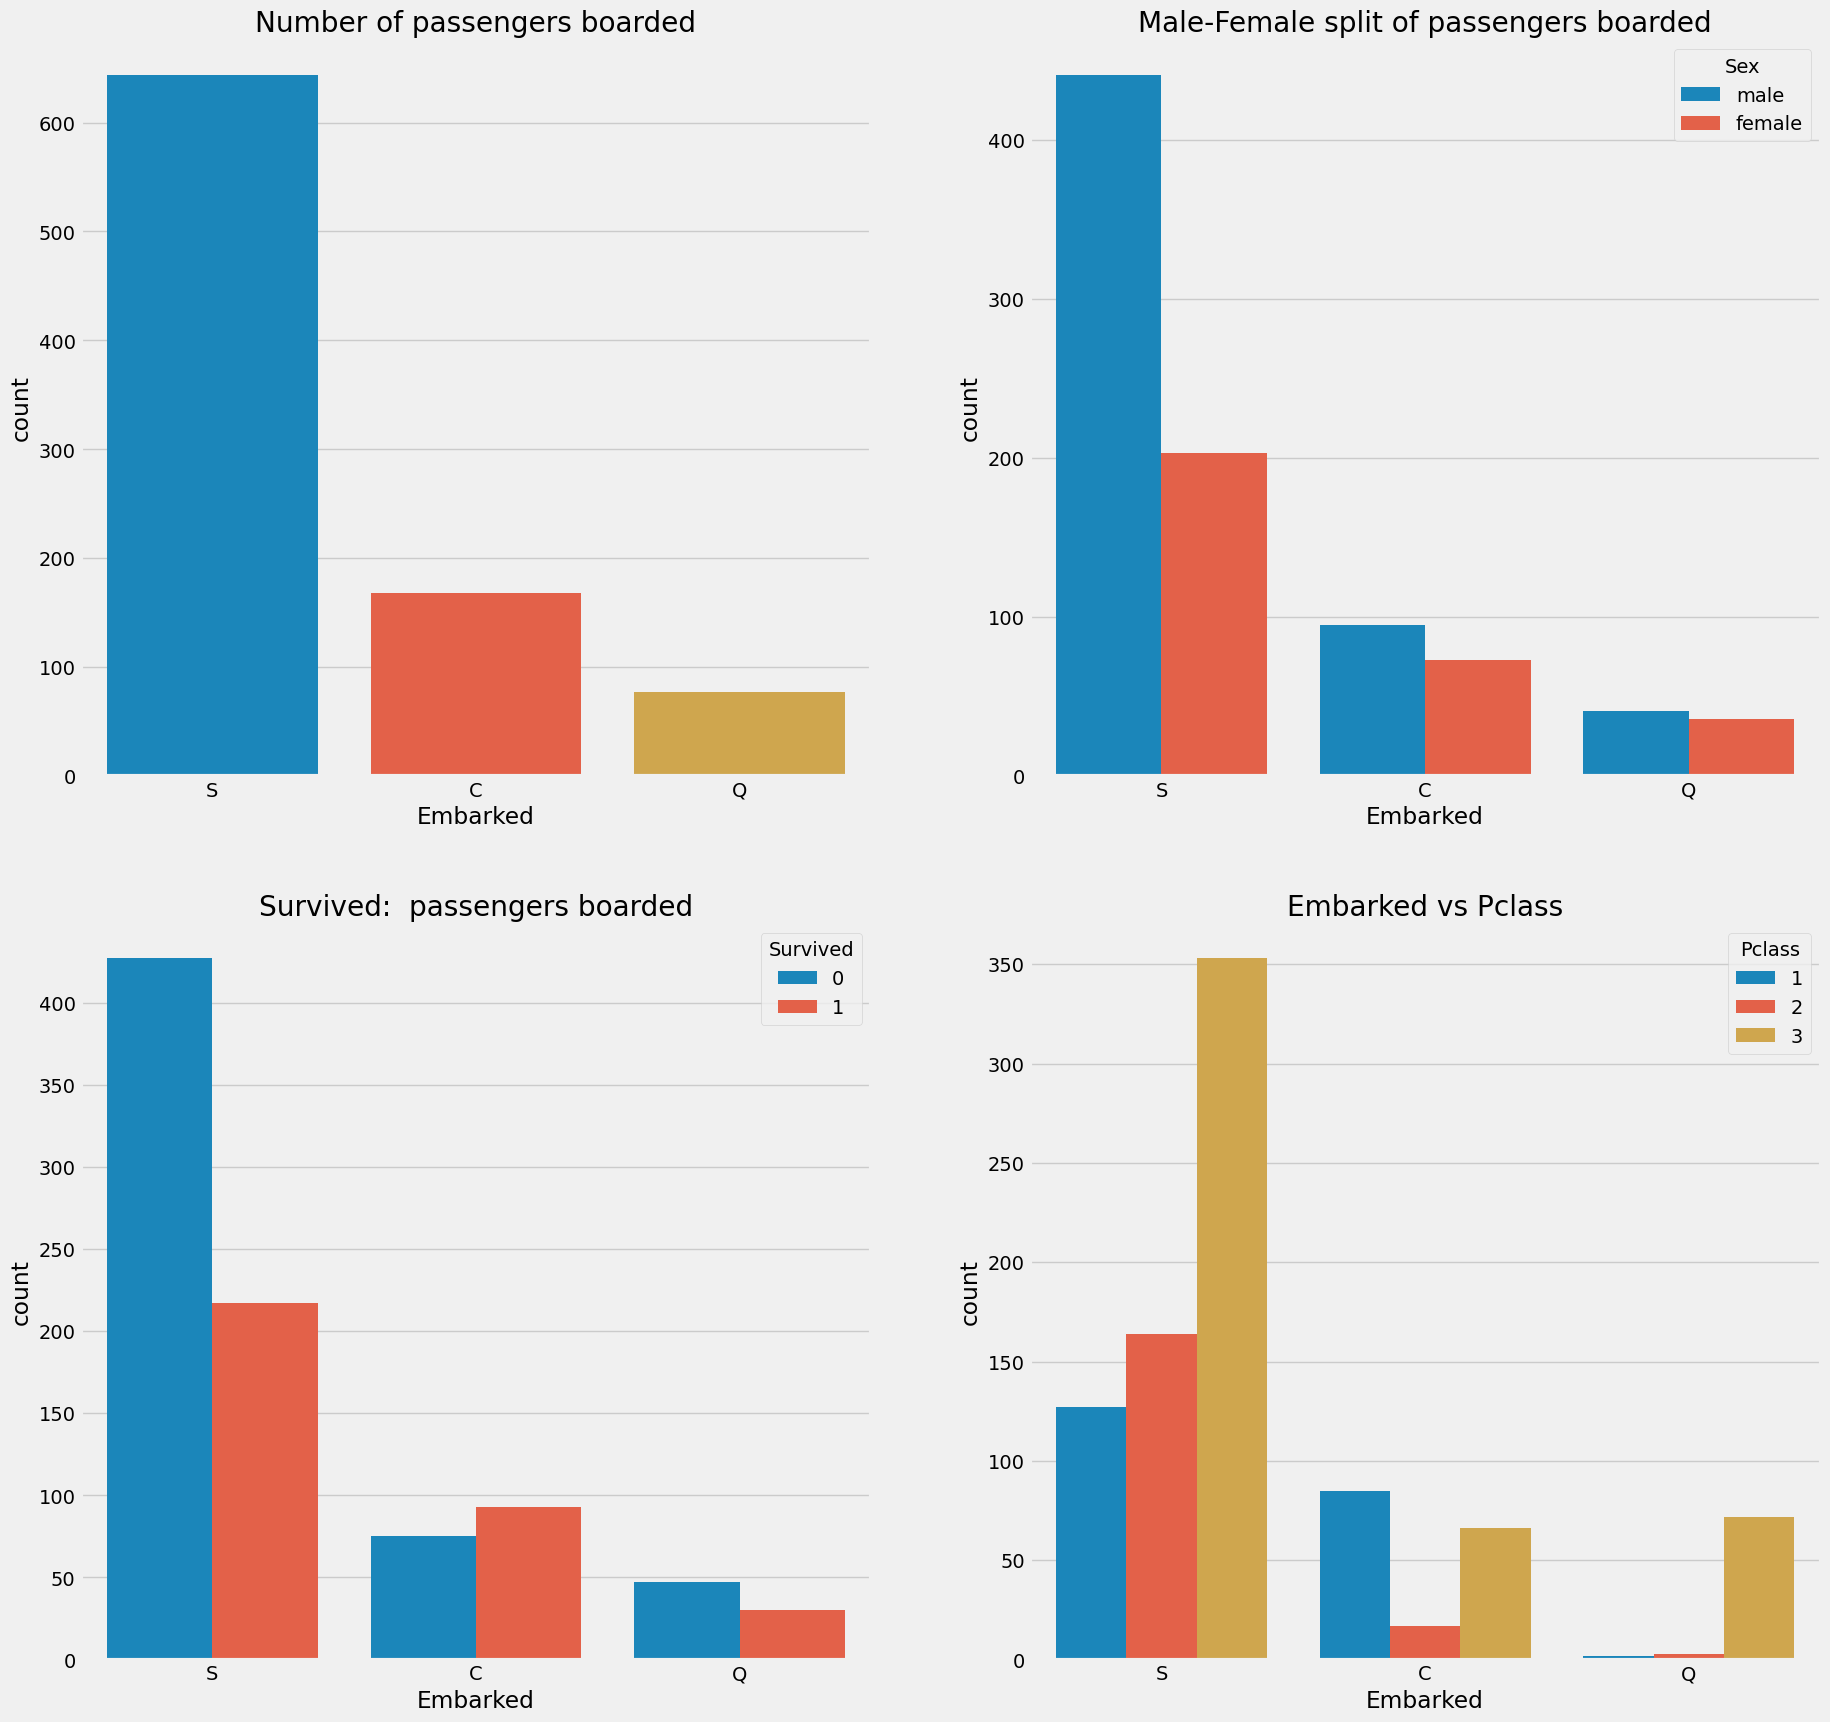

In [40]:
f, ax = plt.subplots(2,2, figsize=(20,20))
sns.countplot('Embarked', data=data, ax = ax[0,0])
ax[0,0].set_title('Number of passengers boarded')

sns.countplot('Embarked', hue = 'Sex', data=data, ax = ax[0,1])
ax[0,1].set_title('Male-Female split of passengers boarded')

sns.countplot('Embarked', hue = 'Survived', data=data, ax = ax[1,0])
ax[1,0].set_title('Survived:  passengers boarded')

sns.countplot('Embarked', hue = 'Pclass', data=data, ax = ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

We can clearly observed that passengers from Block C (board C) had a higher chance of survival comparing to other blocks. Part of the reason could be that most of the people on board C where passenger class 1, so maybe they got more prefference than other boards/blocks.

Close to 80% of passenger 3 class didnt survived, this could be related to that most of them were in block S (embarked) which had the highest death rate.



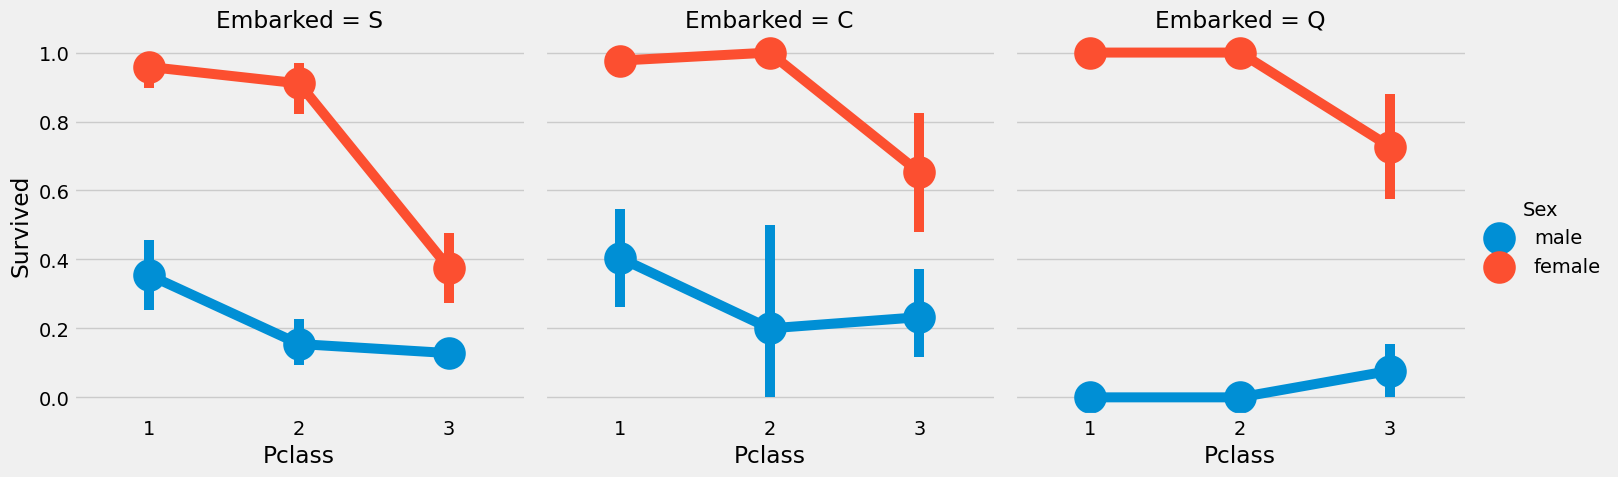

In [42]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col= 'Embarked', data = data)
plt.show()

Female still have a lot higher chances when it comes to surrival regarding on the embarked class. Still we can observed that if a female was embarked on Block S, the chances of survival were drastically reduced. 

For men, being embarked on block Q, would be the worst scenario, cause they had the worst survival rate.

In [43]:
data['Embarked'].isna().sum()

2

In [45]:
data['Embarked'].fillna('S', inplace = True)

In [46]:
data['Embarked'].isna().sum()

0

In [47]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Initial          0
dtype: int64

In [48]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [49]:
pd.crosstab(data['SibSp'], data['Survived'])

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


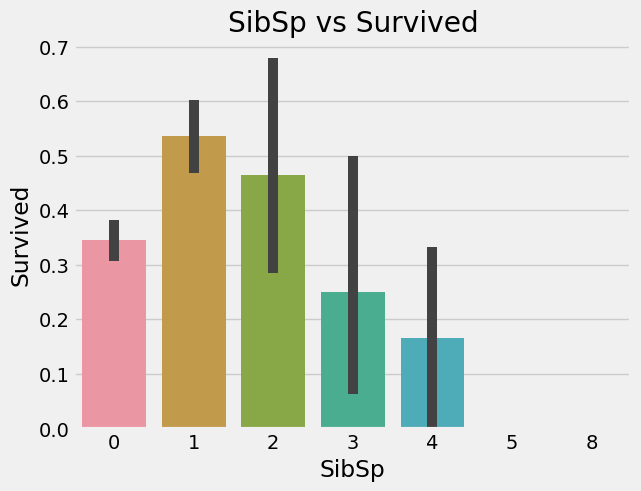

In [66]:

sns.barplot('SibSp', 'Survived', data=data)
plt.title('SibSp vs Survived')
plt.show()

# fare - continous value

In [68]:
data['Fare'].max(), data['Fare'].min(), data['Fare'].mean()

(512.3292, 0.0, 32.2042079685746)

Text(0.5, 1.0, 'Fares in Pclass 3')

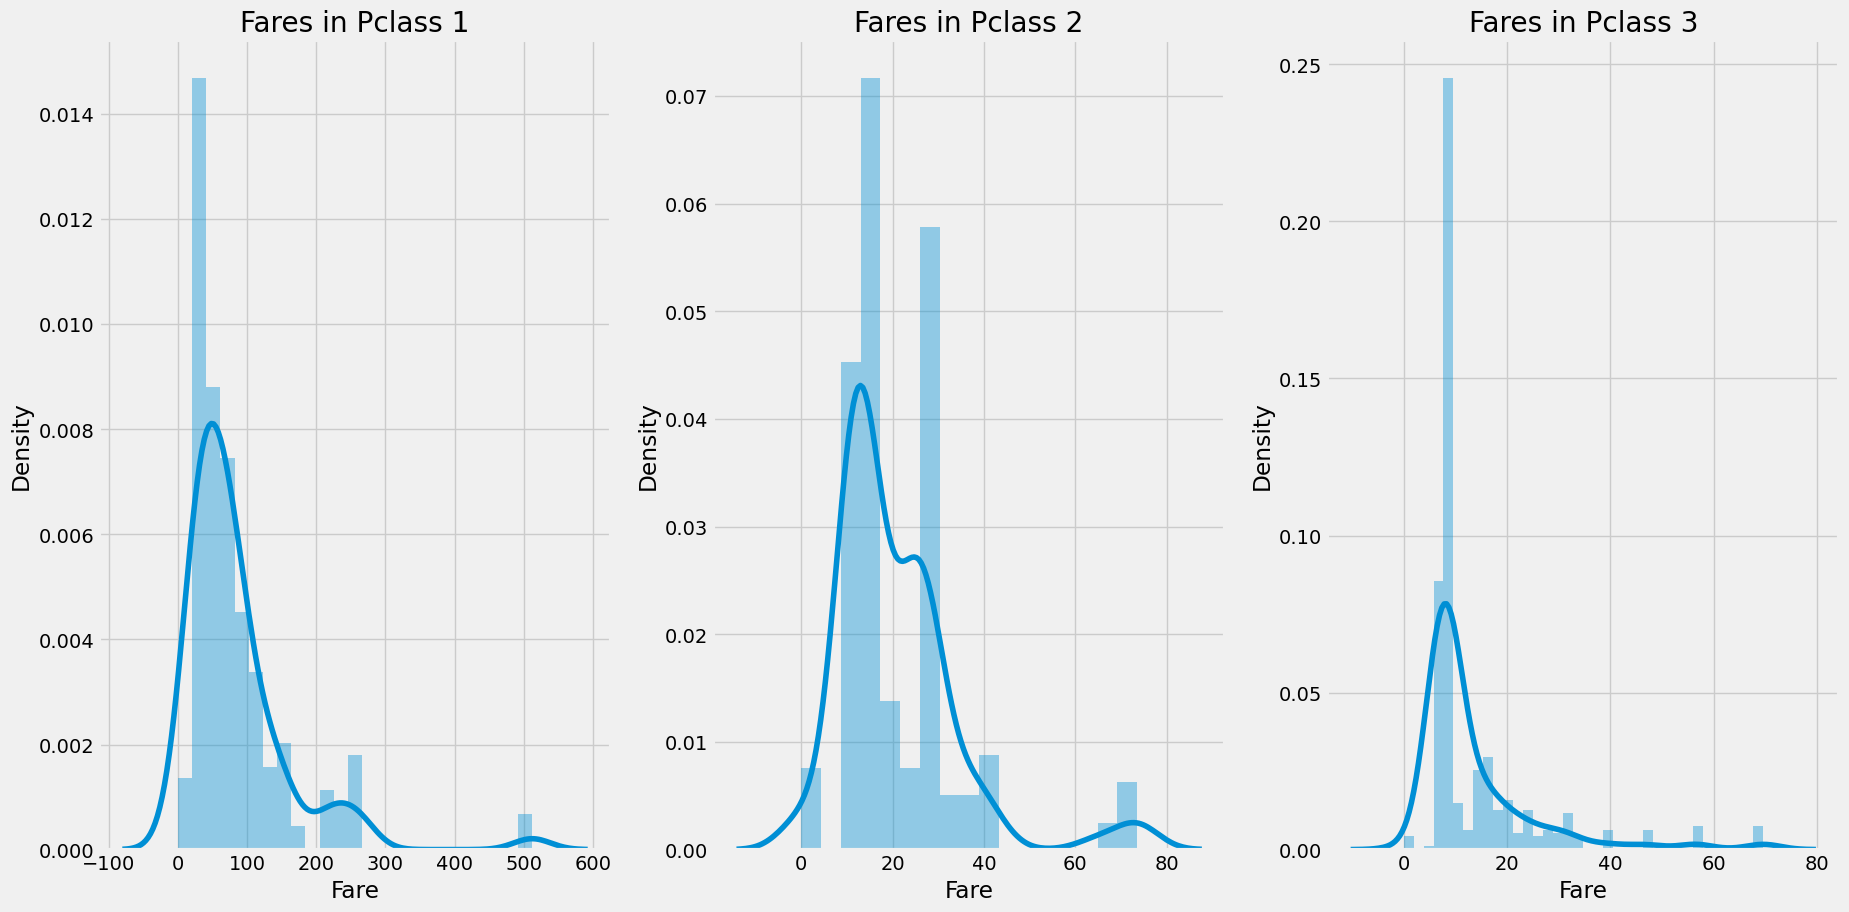

In [72]:
f, ax = plt.subplots(1,3, figsize = (20, 10))

sns.distplot(data[data['Pclass']==1]['Fare'], ax=ax[0])
sns.distplot(data[data['Pclass']==2]['Fare'], ax=ax[1])
sns.distplot(data[data['Pclass']==3]['Fare'], ax=ax[2])

ax[0].set_title('Fares in Pclass 1')
ax[1].set_title('Fares in Pclass 2')
ax[2].set_title('Fares in Pclass 3')


# Conclusion

Let me recap the booty of observations:
- Sex: Women has more survival chances than men. Fair maidens outshone the gents in terms of survival chances.
- Pclass: Class 1 > Class 2 > class3 in terms of survival rate
- Age: The young buccaneers aged 5 to 10 had the highest chance of surviving the perilous voyage. However, beware the treacherous waters for those around the ages of 30 to 35, as they faced the highest risk of meeting their untimely demise.
- Embark: C por had the highest survival rate

